In [1]:
import pandas as pd

# Lettura dati

In [22]:
df = pd.read_csv(
    "C:/Users/Admin/Documents/GitHub/MoneyMinder/data/dataframe_20231202_194450.csv"
)
df.head()

,Unnamed: 0,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento
0,103.0,2022-11-02,Trenit S721130bstazione Pinerolo,Effettuato Il 02/11/2022 Alle Ore 0740 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42.00,NaN,NaN,NaN
1,102.0,2022-11-05,Lappetito Corso Torino 48 P,LAPPETITO CORSO TORINO 48 P05/112058 Carta N.5...,Conto 1000/00071615,CONTABILIZZATO,Ristoranti e bar,EUR,-14.00,NaN,NaN,NaN
2,101.0,2022-11-12,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2022 ALLE ORE 0209 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,NaN,NaN,NaN
3,100.0,2022-12-01,Trenit S721130bstazione Pinerolo,Effettuato Il 01/12/2022 Alle Ore 0806 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42.00,NaN,NaN,NaN
4,99.0,2022-12-07,263806013007357#the Space Cinema Beinasco,Effettuato Il 07/12/2022 Alle Ore 1331 Mediant...,Conto 1000/00071615,CONTABILIZZATO,Spettacoli e musei,EUR,-71.40,NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         104 non-null    float64
 1   Data               143 non-null    object 
 2   Operazione         143 non-null    object 
 3   Dettagli           143 non-null    object 
 4   Conto o carta      143 non-null    object 
 5   Contabilizzazione  143 non-null    object 
 6   Categoria banca    143 non-null    object 
 7   Valuta             143 non-null    object 
 8   Importo            143 non-null    float64
 9   Categoria          0 non-null      float64
 10  Subcategoria       0 non-null      float64
 11  Commento           0 non-null      float64
dtypes: float64(5), object(7)
memory usage: 13.5+ KB


In [24]:
def process_data(df, date=df["Data"]):
    date = pd.to_datetime(date)
    df["Data"].fillna(pd.NaT, inplace=True)
    df["UTC"] = date.dt.tz_localize("Europe/Rome").dt.tz_convert("UTC")
    df["UTC"].apply(lambda x: x.timestamp()).astype(int)
    # Converti la colonna 'Importo' in numeri
    df["Importo"] = pd.to_numeric(df["Importo"], errors="coerce")
    # Calcola il saldo del conto dopo ogni transazione
    df["Balance"] = df["Importo"].cumsum()
    return df

In [25]:
df = process_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Unnamed: 0         104 non-null    float64            
 1   Data               143 non-null    object             
 2   Operazione         143 non-null    object             
 3   Dettagli           143 non-null    object             
 4   Conto o carta      143 non-null    object             
 5   Contabilizzazione  143 non-null    object             
 6   Categoria banca    143 non-null    object             
 7   Valuta             143 non-null    object             
 8   Importo            143 non-null    float64            
 9   Categoria          0 non-null      float64            
 10  Subcategoria       0 non-null      float64            
 11  Commento           0 non-null      float64            
 12  UTC                143 non-null    datetime64[ns, 

Sì, è possibile utilizzare un sistema di riferimento diverso dal timestamp Unix (che ha come riferimento il 1 gennaio 1970). Tuttavia, dovrai definire il tuo sistema di riferimento. Ad esempio, potresti voler contare il numero di giorni a partire da una data specifica. Ecco un esempio di come potresti farlo:

```python
from datetime import datetime

# Definisci la tua data di riferimento
data_riferimento = datetime(2000, 1, 1)

# Calcola il numero di giorni tra la data di riferimento e la data che vuoi convertire
df['giorni'] = (df['Data'] - data_riferimento).dt.days
```

In questo esempio, `'Data'` è il nome della colonna con le date e `'giorni'` sarà la nuova colonna con il numero di giorni trascorsi dalla data di riferimento. Questo codice sottrae la data di riferimento da ogni data nella colonna 'Data' e calcola il numero di giorni tra le due date.

Ricorda che questo è solo un esempio e potresti dover adattarlo in base alle tue esigenze specifiche. Ad esempio, potresti voler contare il numero di minuti, ore o secondi invece che di giorni. In tal caso, dovrai modificare il codice di conseguenza. Se hai bisogno di ulteriori dettagli o hai altre domande, non esitare a chiedere!

In [18]:
# UTC to datetime
def UTC_to_datetime(df, date=df["Data"]):
    date = pd.to_datetime(df["UTC"], unit="s")
    return df

In [20]:
df=UTC_to_datetime(df)
df.head()

,Unnamed: 0,Data,Operazione,Dettagli,Conto o carta,Contabilizzazione,Categoria banca,Valuta,Importo,Categoria,Subcategoria,Commento,UTC
0,103.0,2022-11-02,Trenit S721130bstazione Pinerolo,Effettuato Il 02/11/2022 Alle Ore 0740 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42.00,NaN,NaN,NaN,2022-11-01 23:00:00+00:00
1,102.0,2022-11-05,Lappetito Corso Torino 48 P,LAPPETITO CORSO TORINO 48 P05/112058 Carta N.5...,Conto 1000/00071615,CONTABILIZZATO,Ristoranti e bar,EUR,-14.00,NaN,NaN,NaN,2022-11-04 23:00:00+00:00
2,101.0,2022-11-12,ILIAD ITALIA Roma,EFFETTUATO IL 12/11/2022 ALLE ORE 0209 MEDIANT...,Conto 1000/00071615,CONTABILIZZATO,Cellulare,EUR,-5.99,NaN,NaN,NaN,2022-11-11 23:00:00+00:00
3,100.0,2022-12-01,Trenit S721130bstazione Pinerolo,Effettuato Il 01/12/2022 Alle Ore 0806 Mediant...,Conto 1000/00071615,CONTABILIZZATO,"Trasporti, noleggi, taxi e parcheggi",EUR,-42.00,NaN,NaN,NaN,2022-11-30 23:00:00+00:00
4,99.0,2022-12-07,263806013007357#the Space Cinema Beinasco,Effettuato Il 07/12/2022 Alle Ore 1331 Mediant...,Conto 1000/00071615,CONTABILIZZATO,Spettacoli e musei,EUR,-71.40,NaN,NaN,NaN,2022-12-06 23:00:00+00:00


# Prevvisione

In [69]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [33]:
df = process_data(df)

X = df["UTC"].values.reshape(-1, 1)
y = df["Balance"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # addestramento del modello


LinearRegression()

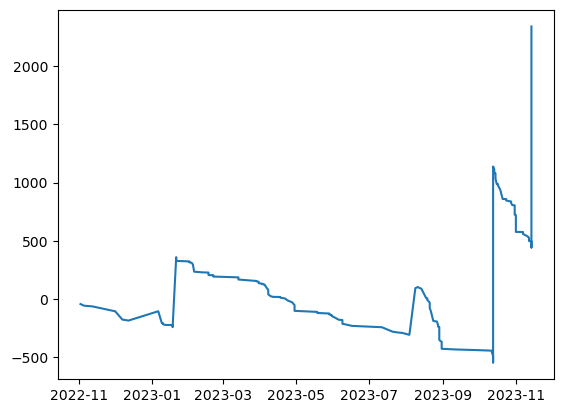

In [34]:
plt.plot(X,y)

In [117]:
n=365

In [118]:
_df = pd.DataFrame()
_df["Date"] = pd.date_range(start=df["Data"].max(), periods=n, freq="D")


In [119]:
_df["UTC"] = (
    _df["Date"]
    .dt.tz_localize("Europe/Rome")
    .dt.tz_convert("UTC")
    .apply(lambda x: x.timestamp())
    .astype(int)
)


In [120]:
_df

,Date,UTC
0,2023-11-14,1699916400
1,2023-11-15,1700002800
2,2023-11-16,1700089200
3,2023-11-17,1700175600
4,2023-11-18,1700262000
...,...,...
360,2024-11-08,1731020400
361,2024-11-09,1731106800
362,2024-11-10,1731193200
363,2024-11-11,1731279600


In [93]:
x_pred=_df["UTC"]
# Trasforma x_pred in un array numpy per l'uso con il tuo modello
x_pred = np.array(x_pred).reshape(-1, 1)
# Fai previsioni sul saldo del conto per i prossimi 30 giorni
y_pred = regressor.predict(x_pred)

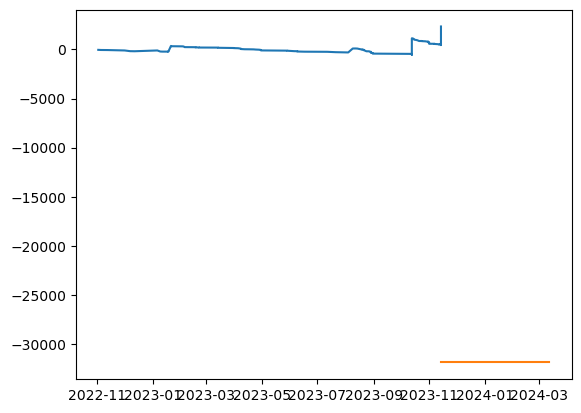

In [94]:
plt.plot(X, y)
plt.plot(_df["Date"], y_pred)

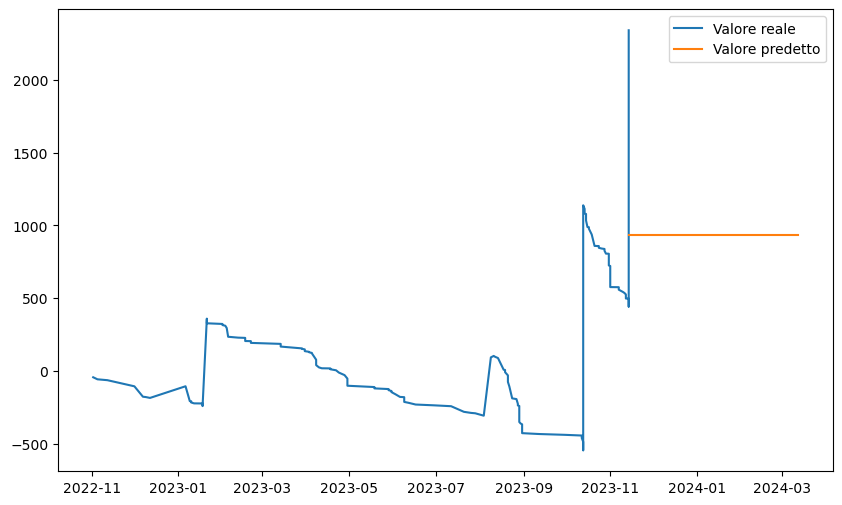

In [107]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


def train_and_plot(X_train, y_train, X_test):
    X_train = X_train.apply(lambda x: x.timestamp()).astype(int)

    # Crea il modello
    model = DecisionTreeRegressor(max_depth=5, min_samples_split=5, max_features=3)

    # Addestra il modello
    model.fit(np.array(X_train).reshape(-1, 1), y_train)

    # Fai una previsione
    y_pred = model.predict(np.array(X_test).reshape(-1, 1))

    # Crea un grafico
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(X_train, unit="s"), y_train, label="Valore reale")
    plt.plot(pd.to_datetime(X_test, unit="s"), y_pred, label="Valore predetto")
    plt.legend()
    plt.show()


# Utilizza la funzione
train_and_plot(df["UTC"], df["Balance"], _df["UTC"])

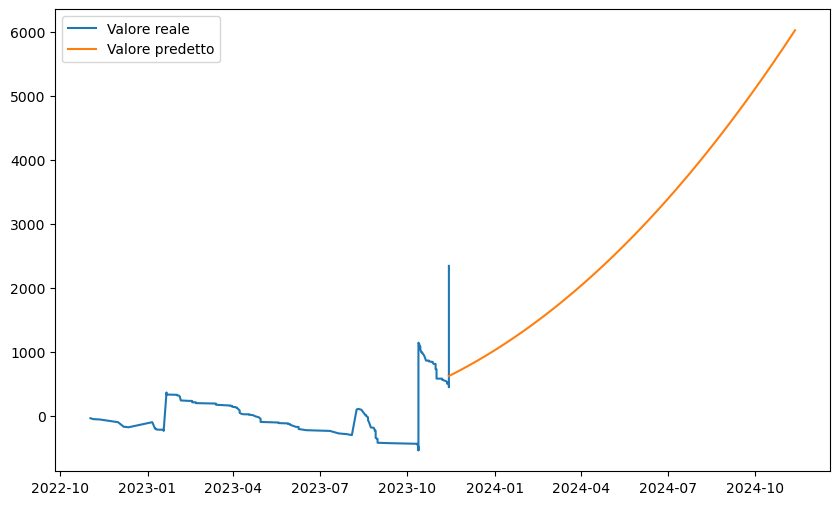

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def train_and_plot(X_train, y_train, X_test):
    X_train = X_train.apply(lambda x: x.timestamp()).astype(int)
    # Crea il modello polinomiale
    poly = PolynomialFeatures(degree=7)
    X_poly = poly.fit_transform(X_train.values.reshape(-1, 1))
    X_poly_test = poly.transform(X_test.values.reshape(-1, 1))

    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Fai una previsione
    y_pred = model.predict(X_poly_test)

    # Crea un grafico
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(X_train, unit="s"), y_train, label="Valore reale")
    plt.plot(pd.to_datetime(X_test, unit="s"), y_pred, label="Valore predetto")
    plt.legend()
    plt.show()


# Utilizza la funzione
train_and_plot(df["UTC"], df["Balance"], _df["UTC"])

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

In [126]:
# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(
    df["UTC"].apply(lambda x: x.timestamp()).astype(int).values.reshape(-1, 1),
    df["Balance"],
    test_size=0.2,
    shuffle=False,
    random_state=0,
)

# Initialize the estimator
mdl_adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.05)

# Fit the data
mdl_adaboost.fit(X_train, Y_train)

AdaBoostRegressor(learning_rate=0.05, n_estimators=500)

In [127]:
# Make predictions
pred = mdl_adaboost.predict(X_test)

test_size = X_test.shape[0]

Text(0.5, 1.0, 'Predicted vs Real with log difference values')

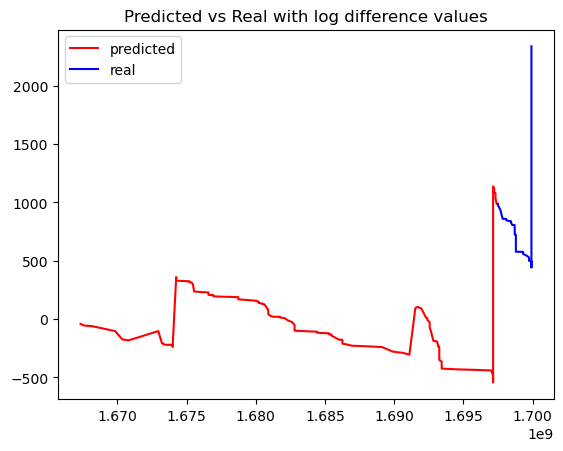

In [133]:
test_size = X_test.shape[0]
plt.plot(
    X_train, Y_train,
    label="predicted",
    color="red",
)
plt.plot(X_test,Y_test, label="real", color="blue"
)
plt.legend(loc="best")
plt.title("Predicted vs Real with log difference values")

https://stackoverflow.com/questions/63517126/any-way-to-predict-monthly-time-series-with-scikit-learn-in-python

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt


def adaboost_prediction(df):
    # Split in train-test
    X_train, X_test, Y_train, Y_test = train_test_split(
        df["UTC"].apply(lambda x: x.timestamp()).astype(int).values.reshape(-1, 1),
        df["Balance"],
        test_size=0.2,
        shuffle=False,
        random_state=0,
    )

    # Initialize the estimator
    mdl_adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.05)

    # Fit the data
    mdl_adaboost.fit(X_train, Y_train)

    # Make predictions
    pred = mdl_adaboost.predict(X_test)

    test_size = X_test.shape[0]

    plt.plot(
        X_train,
        Y_train,
        label="predicted",
        color="red",
    )
    plt.plot(X_test, Y_test, label="real", color="blue")
    plt.legend(loc="best")
    plt.title("Predicted vs Real with log difference values")
    plt.show()

    return pred